In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import os
import sys
sys.path.append(os.path.abspath('../src'))
from segmentation import segment_cough, compute_SNR

# Cough segmentation and SNR computation example
Learn how to use the automatic cough segmentation function. The target signal is comprised of a breath followed by two coughs and a throat-clearing noise. Our goal is to segment each individual cough sound using the segment_cough function, and then compute the SNR of the recording.

Text(0.5, 1.0, 'Input cough signal')

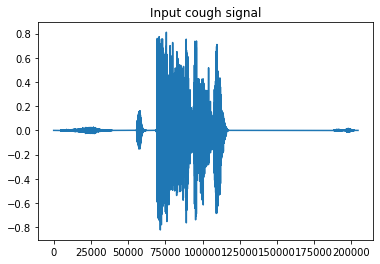

In [17]:
#Visualize cough signal
file = "../sample_recordings/cough.wav"
x,fs = librosa.load(file, sr=None)
plt.plot(x)
plt.title("Input cough signal")

### Segmentation with default parameters
By default, the minimal cough length (below which segments are discarded) is set to 200ms and the "padding" (extra signal samples before and after each detected cough) is 200ms. These thresholds are based on the physiology of cough sounds but can be adjusted to fit your applications.

Text(0.5, 1.0, 'Segmentation Output')

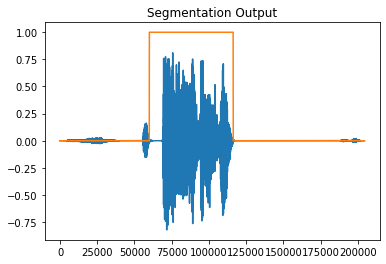

In [18]:
cough_segments, cough_mask = segment_cough(x,fs)
plt.plot(x)
plt.plot(cough_mask)
plt.title("Segmentation Output")

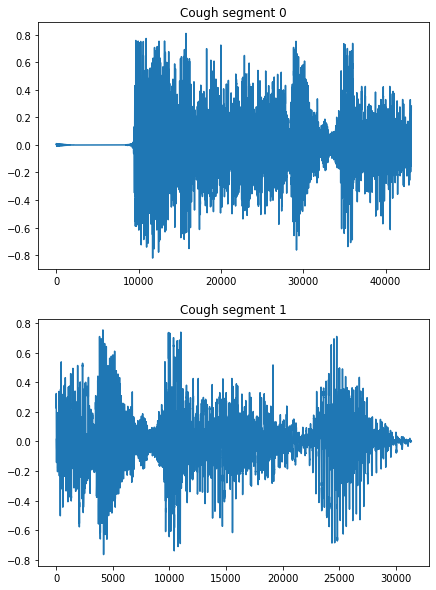

In [19]:
fig, axs = plt.subplots(len(cough_segments),1, figsize=(7,10))
for i in range(0,len(cough_segments)):
    axs[i].plot(cough_segments[i])
    axs[i].set_title("Cough segment " + str(i))

### Remove extra signal before/after cough
To reduce extra signal samples around each cough, modify "cough_padding"

Text(0.5, 1.0, 'Segmentation Output')

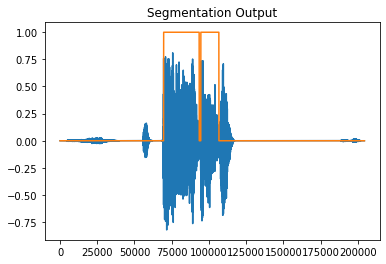

In [14]:
cough_segments, cough_mask = segment_cough(x,fs, cough_padding=0)
plt.plot(x)
plt.plot(cough_mask)
plt.title("Segmentation Output")

We can see that both the breath and the throat-clearning noise at the end are successfully removed.

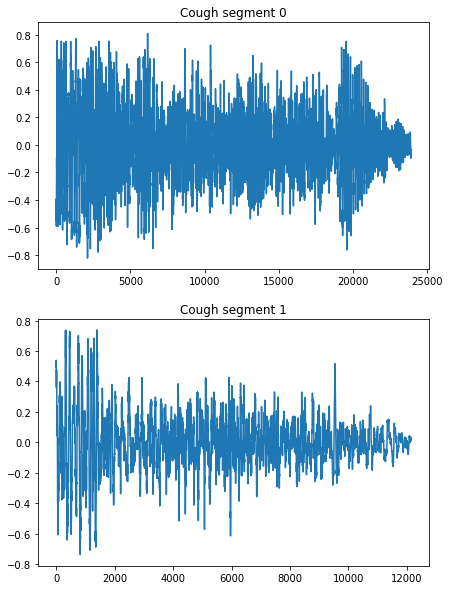

In [15]:
fig, axs = plt.subplots(len(cough_segments),1, figsize=(7,10))
for i in range(0,len(cough_segments)):
    axs[i].plot(cough_segments[i])
    axs[i].set_title("Cough segment " + str(i))

### Compute SNR of cough signal
Compute an estimate of the SNR by taking the ratio of the power of the cough part of the signal to the ratio of the rest of the signal (i.e. background noise).

In [16]:
snr = compute_SNR(x,fs)
print("The SNR of the cough signal is {0}".format(snr))

The SNR of the cough signal is 24.53300952911377
